# Goal: Work with group on the Regression Modeling of the Baseball Players dataset 

* Will divide the class into the groups, the best way is to randomly divide the group
* Each group will work on the problem together
* I will join the groups and answer the questions from time to time
* Once you guys complete the work, each of the group will present the findings to the class

## Baseball Players dataset description





#### Major League Baseball Data from the 1986 and 1987 seasons.
** A data frame with 322 observations of major league players on the following 20 variables **

* AtBat: Number of times at bat in 1986
* Hits: Number of hits in 1986
* HmRun: Number of home runs in 1986
* Runs: Number of runs in 1986
* RBI: Number of runs batted in in 1986
* Walks: Number of walks in 1986
* Years: Number of years in the major leagues
* CAtBat: Number of times at bat during his career
* CHits: Number of hits during his career
* CHmRun: Number of home runs during his career
* CRuns: Number of runs during his career
* CRBI: Number of runs batted in during his career
* Walks: Number of walks during his career
* League: A factor with levels A and N indicating player's league at the end of 1986
* Division: A factor with levels E and W indicating player's division at the end of 1986
* PutOuts: Number of put outs in 1986
* Assists: Number of assists in 1986
* Errors: Number of errors in 1986
* Salary: 1987 annual salary on opening day in thousands of dollars
* NewLeague: A factor with levels A and N indicating player's league at the beginning of 1987
	
		
		






		
		
		

		

		

In [1]:

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
%matplotlib inline

import sklearn
from sklearn import datasets, linear_model
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,r2_score,mean_absolute_error
from sklearn.metrics import mean_absolute_percentage_error
from sklearn.preprocessing import StandardScaler

from numpy import arange
from sklearn.linear_model import LassoCV
from sklearn.model_selection import RepeatedKFold
from sklearn.model_selection import cross_val_score

from sklearn.linear_model import RidgeCV

from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Lasso

pd.set_option('display.max_columns',200) #allows for up to 500 columns to be displayed when viewing a dataframe
pd.set_option('display.max_rows',100)
plt.style.use('ggplot') # a style that can be used for plots - see style reference above

import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)

In [2]:
print('The scikit-learn version is {}.'.format(sklearn.__version__))#older version do not support the mean_absolute_percentage_error

The scikit-learn version is 1.3.0.


In [3]:
# If your sklearn package is old, use the folling line of code to upgrade the sklearn package
# !pip install -U scikit-learn

## Read the data 

In [4]:
df_Hi = pd.read_csv('Dataset/BaseballPlayersData.csv')
df_Hi.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 322 entries, 0 to 321
Data columns (total 20 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   AtBat      322 non-null    int64  
 1   Hits       322 non-null    int64  
 2   HmRun      322 non-null    int64  
 3   Runs       322 non-null    int64  
 4   RBI        322 non-null    int64  
 5   Walks      322 non-null    int64  
 6   Years      322 non-null    int64  
 7   CAtBat     322 non-null    int64  
 8   CHits      322 non-null    int64  
 9   CHmRun     322 non-null    int64  
 10  CRuns      322 non-null    int64  
 11  CRBI       322 non-null    int64  
 12  CWalks     322 non-null    int64  
 13  League     322 non-null    object 
 14  Division   322 non-null    object 
 15  PutOuts    322 non-null    int64  
 16  Assists    322 non-null    int64  
 17  Errors     322 non-null    int64  
 18  Salary     322 non-null    float64
 19  NewLeague  322 non-null    object 
dtypes: float64

In [5]:
df_Hi.describe()

,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,PutOuts,Assists,Errors,Salary
count,322.000000,322.000000,322.000000,322.000000,322.000000,322.000000,322.000000,322.00000,322.000000,322.000000,322.000000,322.000000,322.000000,322.000000,322.000000,322.000000,322.000000
mean,380.928571,101.024845,10.770186,50.909938,48.027950,38.742236,7.444099,2648.68323,717.571429,69.490683,358.795031,330.118012,260.239130,288.937888,106.913043,8.040373,529.599284
std,153.404981,46.454741,8.709037,26.024095,26.166895,21.639327,4.926087,2324.20587,654.472627,86.266061,334.105886,333.219617,267.058085,280.704614,136.854876,6.368359,433.014112
min,16.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,19.00000,4.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,67.500000
25%,255.250000,64.000000,4.000000,30.250000,28.000000,22.000000,4.000000,816.75000,209.000000,14.000000,100.250000,88.750000,67.250000,109.250000,7.000000,3.000000,193.897891
50%,379.500000,96.000000,8.000000,48.000000,44.000000,35.000000,6.000000,1928.00000,508.000000,37.500000,247.000000,220.500000,170.500000,212.000000,39.500000,6.000000,430.750000
75%,512.000000,137.000000,16.000000,69.000000,64.750000,53.000000,11.000000,3924.25000,1059.250000,90.000000,526.250000,426.250000,339.250000,325.000000,166.000000,11.000000,750.000000
max,687.000000,238.000000,40.000000,130.000000,121.000000,105.000000,24.000000,14053.00000,4256.000000,548.000000,2165.000000,1659.000000,1566.000000,1378.000000,492.000000,32.000000,2460.000000


In [6]:
df_Hi.head()

,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,League,Division,PutOuts,Assists,Errors,Salary,NewLeague
0,315,81,7,24,38,39,14,3449,835,69,321,414,375,N,W,632,43,10,475.0,N
1,479,130,18,66,72,76,3,1624,457,63,224,266,263,A,W,880,82,14,480.0,A
2,496,141,20,65,78,37,11,5628,1575,225,828,838,354,N,E,200,11,3,500.0,N
3,321,87,10,39,42,30,2,396,101,12,48,46,33,N,E,805,40,4,91.5,N
4,594,169,4,74,51,35,11,4408,1133,19,501,336,194,A,W,282,421,25,750.0,A


## Day 1 Task

Step 1

* Explore the data, and visualize the data from multiple avenues
* Change the categorical variables to the numerical variables using appropriate method
* You may want to do some feature engineering to create the meaningful predictors
* Create the 80/20 train test split and then standardize the data
* Run the Simple linear regression for each predictor with the Salary being the target variable
* Explain the relationship of each individual predictor with the target variable
* Write the simple linear regression equation
* Discuss which variable is most significant predictor of the players salary?
* Explore the various accuracy measures such as MAPE, RMSE, R^2. What do those values mean in terms of your problem? Explain.
* Perform multiple linear regression taking three predictors that you observe most relevant for predicting salary.
* Discuss your observations.
* Provide a summary of the result.



* Plan for the 1-2 minutes informal presentation of your findings to the class.

Note: At the end of the session, each group will present the findings to the class and email single main copy of their notebook representing groups overall  achievement

### Missing Values

In [7]:
# Count the number of missing values in each column
print(df_Hi.isnull().sum())

AtBat        0
Hits         0
HmRun        0
Runs         0
RBI          0
Walks        0
Years        0
CAtBat       0
CHits        0
CHmRun       0
CRuns        0
CRBI         0
CWalks       0
League       0
Division     0
PutOuts      0
Assists      0
Errors       0
Salary       0
NewLeague    0
dtype: int64


#### Histogram for numerical variables

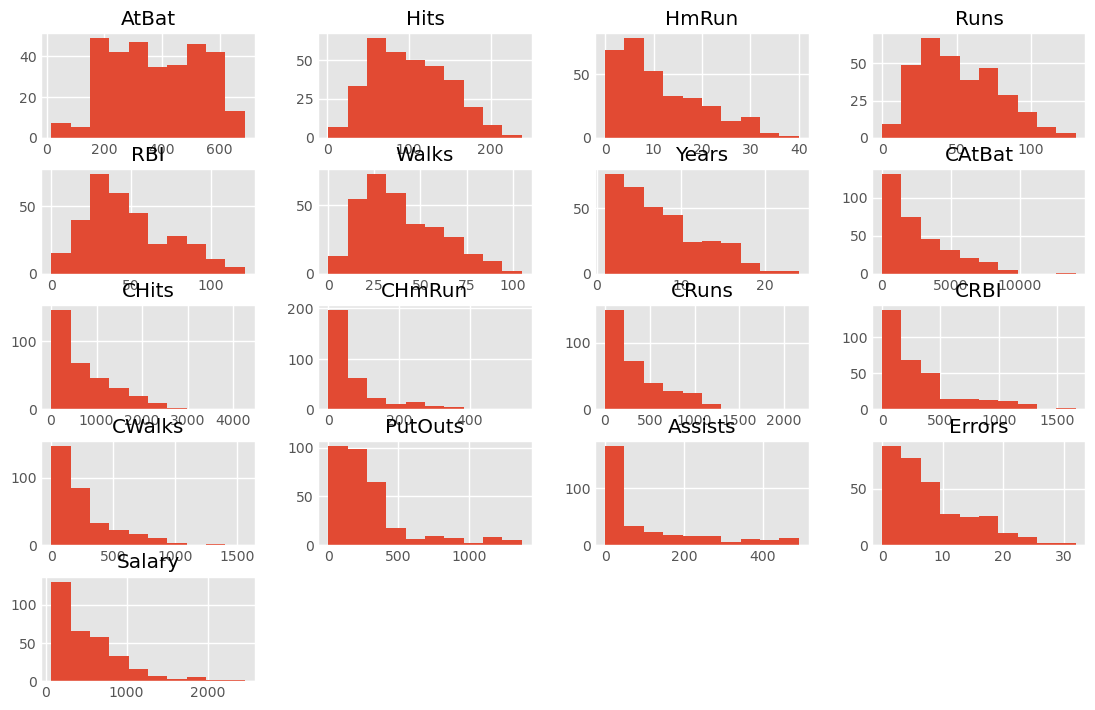

In [8]:
df_Hi.hist(figsize=(12, 8))
plt.show()

#### Count Plots for Categorical Variables

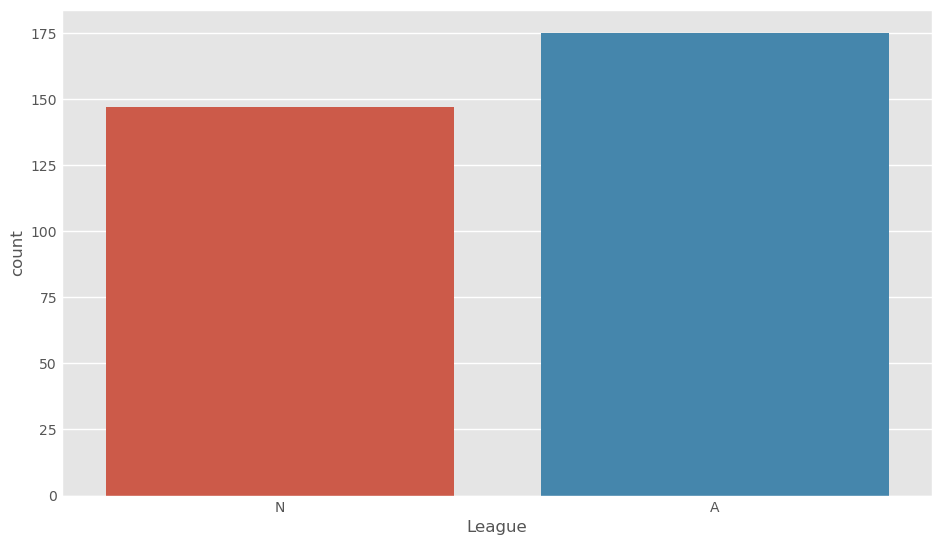

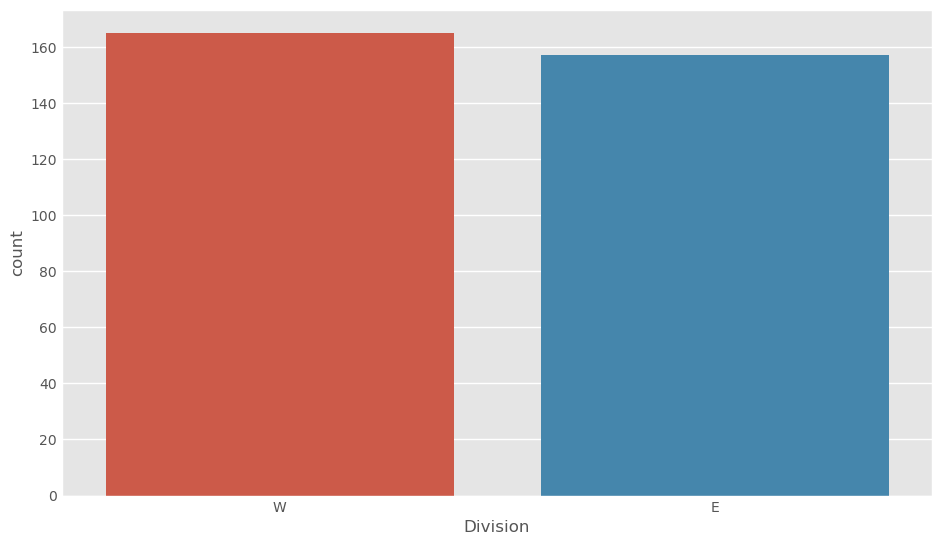

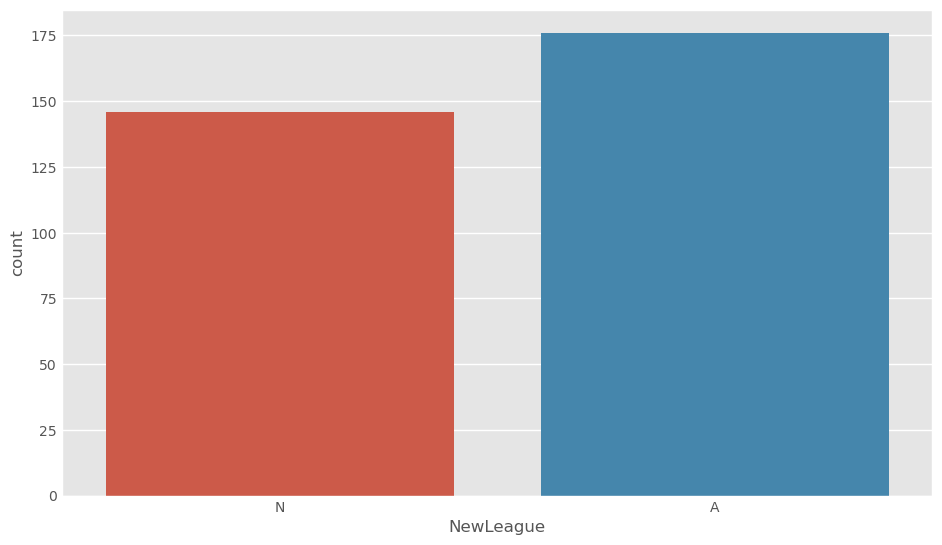

In [9]:
plt.figure(figsize=(10, 6))
sns.countplot(x='League', data=df_Hi)
plt.show()

plt.figure(figsize=(10, 6))
sns.countplot(x='Division', data=df_Hi)
plt.show()

plt.figure(figsize=(10, 6))
sns.countplot(x='NewLeague', data=df_Hi)
plt.show()

### Converting Categorical Variables to Numerical Variables

In [10]:
#Create prefix for dummy variables
var_dummy_prefix_NL = "NewLeague"
var_dummy_prefix_D = 'Division'
var_dummy_prefix_L = 'League'

#Find the highest count category
# -----------New League -------------#
df_dummy_NL = pd.DataFrame(df_Hi['NewLeague'].value_counts().reset_index())
var_dummy_NL = df_dummy_NL.iloc[0, 0]

# -----------Division----------------#
df_dummy_D = pd.DataFrame(df_Hi['Division'].value_counts().reset_index())
var_dummy_D = df_dummy_D.iloc[0, 0]

# -----------League----------------#
df_dummy_L = pd.DataFrame(df_Hi['League'].value_counts().reset_index())
var_dummy_L = df_dummy_L.iloc[0, 0]

#Create variable to drop the highest count column
var_dumpre_NL = var_dummy_prefix_NL + "_" +  var_dummy_NL
var_dumpre_D = var_dummy_prefix_D + "_" +  var_dummy_D
var_dumpre_L = var_dummy_prefix_L + "_" +  var_dummy_L

#Create dummy variables
New_League_Dummies = pd.get_dummies(df_Hi['NewLeague'], drop_first = False, prefix=var_dummy_prefix_NL)
Division_Dummies = pd.get_dummies(df_Hi['Division'], drop_first = False, prefix=var_dummy_prefix_D)
League_Dummies = pd.get_dummies(df_Hi['League'], drop_first = False, prefix=var_dummy_prefix_L)

#Drop the highest count dummy variable
New_League_Dummies = New_League_Dummies.drop(var_dumpre_NL, axis = 1)
Division_Dummies = Division_Dummies.drop(var_dumpre_D, axis = 1)
League_Dummies = League_Dummies.drop(var_dumpre_L, axis = 1)

In [11]:

df_Hi = pd.concat([df_Hi, League_Dummies,Division_Dummies,New_League_Dummies], axis=1)
df_Hi = df_Hi.drop(['League','Division','NewLeague'], axis=1)
df_Hi.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 322 entries, 0 to 321
Data columns (total 20 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   AtBat        322 non-null    int64  
 1   Hits         322 non-null    int64  
 2   HmRun        322 non-null    int64  
 3   Runs         322 non-null    int64  
 4   RBI          322 non-null    int64  
 5   Walks        322 non-null    int64  
 6   Years        322 non-null    int64  
 7   CAtBat       322 non-null    int64  
 8   CHits        322 non-null    int64  
 9   CHmRun       322 non-null    int64  
 10  CRuns        322 non-null    int64  
 11  CRBI         322 non-null    int64  
 12  CWalks       322 non-null    int64  
 13  PutOuts      322 non-null    int64  
 14  Assists      322 non-null    int64  
 15  Errors       322 non-null    int64  
 16  Salary       322 non-null    float64
 17  League_N     322 non-null    uint8  
 18  Division_E   322 non-null    uint8  
 19  NewLeagu

#### Create the Meaningful Predictors

In [12]:
med_sal = df_Hi['Salary'].median()
# med_sal_float = med_sal[0]

df_Hi['Abov_Med_Salary'] = df_Hi['Salary'].apply(lambda x: 1 if x > med_sal else 0)

df_Hi.head()


,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,PutOuts,Assists,Errors,Salary,League_N,Division_E,NewLeague_N,Abov_Med_Salary
0,315,81,7,24,38,39,14,3449,835,69,321,414,375,632,43,10,475.0,1,0,1,1
1,479,130,18,66,72,76,3,1624,457,63,224,266,263,880,82,14,480.0,0,0,0,1
2,496,141,20,65,78,37,11,5628,1575,225,828,838,354,200,11,3,500.0,1,1,1,1
3,321,87,10,39,42,30,2,396,101,12,48,46,33,805,40,4,91.5,1,1,1,0
4,594,169,4,74,51,35,11,4408,1133,19,501,336,194,282,421,25,750.0,0,0,0,1


### Splitting the Data

In [13]:
# keep features only for X
X = df_Hi.drop('Salary', axis = 1)

# keep target variable only for y
Y = df_Hi['Salary'] 

# split the train test, here we are doing 80/20 split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 42)

### Standardizing the Data

In [14]:
sc = StandardScaler()
# fit the data i.e calculate the mean and sd of each coluns of X_train
sc.fit(X_train)

#transform the train data
X_train_sc = sc.transform(X_train)
X_train_sc = pd.DataFrame(X_train_sc, columns=X_train.columns)

#transform the test data
X_test_sc = sc.transform(X_test)
X_test_sc = pd.DataFrame(X_test_sc, columns=X_test.columns)

#### Run the Simple linear regression for each predictor with the Salary being the target variable

In [15]:
#import the libraries
import statsmodels
import statsmodels.api as sm
import statsmodels.formula.api as smf

In [17]:
X_reg = X_train_sc
X_reg = sm.add_constant(X_reg) # adding a constant
reg1 = sm.OLS(np.asarray(Y_train), X_reg).fit() 
pred = reg1.predict(X_reg) 

reg1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.709
Model:                            OLS   Adj. R-squared:                  0.684
Method:                 Least Squares   F-statistic:                     28.76
Date:                Wed, 04 Oct 2023   Prob (F-statistic):           4.42e-52
Time:                        20:55:55   Log-Likelihood:                -1749.5
No. Observations:                 257   AIC:                             3541.
Df Residuals:                     236   BIC:                             3615.
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const             526.2150     14.245     36.940      0.000     498.151     554.279
AtBat            -157.2695     76.359     -2.060      0.041    -307.702      -6.837
Hits               40.6059     88.891      0.457      0.648    -134.515     215.727
HmRun              40.5215     42.782      0.947      0.345     -43.762     124.805
Runs               68.7378     60.536      1.135      0.257     -50.523     187.998
RBI                26.8187     53.342      0.503      0.616     -78.269     131.907
Walks              42.7575     30.566      1.399      0.163     -17.460     102.975
Years              -5.5574     45.302     -0.123      0.902     -94.806      83.691
CAtBat           -437.7965    228.491     -1.916      0.057    -887.939      12.346
CHits            -118.7166    317.424     -0.374      0.709    -744.063     506.630
CHmRun           -163.9124    104.268     -1.572      0.117    -369.328      41.503
CRuns             538.7296    181.785      2.964      0.003     180.600     896.859
CRBI              320.9944    175.892      1.825      0.069     -25.525     667.514
CWalks           -103.1980     62.820     -1.643      0.102    -226.958      20.562
PutOuts            54.4548     16.208      3.360      0.001      22.525      86.385
Assists            51.7098     23.290      2.220      0.027       5.828      97.592
Errors            -27.7057     21.598     -1.283      0.201     -70.256      14.845
League_N           26.9428     34.693      0.777      0.438     -41.405      95.290
Division_E         28.4280     14.811      1.919      0.056      -0.751      57.607
NewLeague_N       -25.2443     34.691     -0.728      0.468     -93.588      43.099
Abov_Med_Salary   236.8324     19.189     12.342      0.000     199.028     274.637
==============================================================================
Omnibus:                       86.932   Durbin-Watson:                   2.002
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              328.863
Skew:                           1.378   Prob(JB):                     3.88e-72
Kurtosis:                       7.808   Cond. No.                         80.4
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

#### 6. Explain the relationship of each individual predictor with the target variable

#### 7. Write the simple linear regression equation

In [50]:
# Write single regression equation:
print("=====================================")
print("Parameters: ")
print(reg1.params)
print()#prints space
print("=====================================")
print("Standard errors: ")
print(reg1.bse)
print()
print("=====================================")
print("Predicted values: ", reg1.predict())
print()
print("=====================================")
print("Confidence Interval: ")
print(reg1.conf_int(alpha=0.05, cols=None))

Parameters: 
const              526.215048
AtBat             -157.269488
Hits                40.605862
HmRun               40.521471
Runs                68.737792
RBI                 26.818722
Walks               42.757531
Years               -5.557398
CAtBat            -437.796523
CHits             -118.716604
CHmRun            -163.912418
CRuns              538.729613
CRBI               320.994426
CWalks            -103.198033
PutOuts             54.454754
Assists             51.709766
Errors             -27.705728
League_N            26.942756
Division_E          28.427977
NewLeague_N        -25.244337
Abov_Med_Salary    236.832439
dtype: float64

Standard errors: 
const               14.245213
AtBat               76.359249
Hits                88.890749
HmRun               42.782265
Runs                60.536308
RBI                 53.342429
Walks               30.566178
Years               45.302069
CAtBat             228.490977
CHits              317.423817
CHmRun             104.

#### 8. Discuss which variable is most significant predictor of the players salary?

#### 9. Explore the various accuracy measures such as MAPE, RMSE, R^2. What do those values mean in terms of your problem? Explain.